<a href="https://colab.research.google.com/github/samsomsabu/COMPUTER-VISION-/blob/main/CV_Extra_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

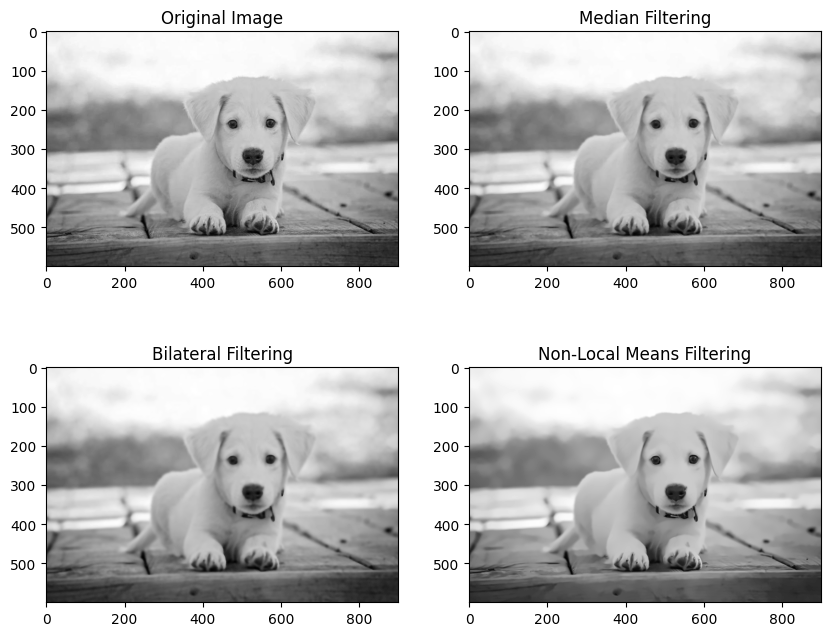

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load an example image
image_url = '/content/dog.jpg'
image = cv2.imread(image_url)

# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply median filtering
median_filtered = cv2.medianBlur(gray_image, ksize=5)  # Adjust the kernel size as needed

# Apply bilateral filtering
bilateral_filtered = cv2.bilateralFilter(gray_image, d=9, sigmaColor=75, sigmaSpace=75)  # Adjust parameters

# Apply non-local means filtering
nlm_filtered = cv2.fastNlMeansDenoising(gray_image, None, h=10, searchWindowSize=21, templateWindowSize=7)  # Adjust parameters

# Plot the results
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filtering')

plt.subplot(2, 2, 3)
plt.imshow(bilateral_filtered, cmap='gray')
plt.title('Bilateral Filtering')

plt.subplot(2, 2, 4)
plt.imshow(nlm_filtered, cmap='gray')
plt.title('Non-Local Means Filtering')

plt.show()


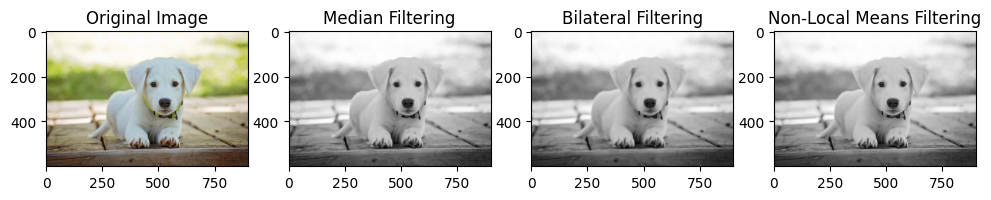

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def user_defined_filtering(image, method, **kwargs):
    """
    Apply user-defined non-linear spatial filtering techniques on the input image.

    Parameters:
    - image: Input image (numpy array).
    - method: Filtering method ('median', 'bilateral', or 'nlm').
    - kwargs: Additional parameters specific to each filtering method.

    Returns:
    - filtered_image: Resulting filtered image.
    """

    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    if method == 'median':
        ksize = kwargs.get('ksize', 3)
        filtered_image = cv2.medianBlur(gray_image, ksize)

    elif method == 'bilateral':
        d = kwargs.get('d', 9)
        sigma_color = kwargs.get('sigma_color', 75)
        sigma_space = kwargs.get('sigma_space', 75)
        filtered_image = cv2.bilateralFilter(gray_image, d, sigma_color, sigma_space)

    elif method == 'nlm':
        h = kwargs.get('h', 10)
        search_window_size = kwargs.get('search_window_size', 21)
        template_window_size = kwargs.get('template_window_size', 7)
        filtered_image = cv2.fastNlMeansDenoising(gray_image, None, h, search_window_size, template_window_size)

    else:
        raise ValueError("Invalid filtering method. Choose 'median', 'bilateral', or 'nlm'.")

    return filtered_image


# Load an example image

image_url = '/content/dog.jpg'
image = cv2.imread(image_url)

# Apply user-defined filtering
median_filtered = user_defined_filtering(image, method='median', ksize=5)
bilateral_filtered = user_defined_filtering(image, method='bilateral', d=9, sigma_color=75, sigma_space=75)
nlm_filtered = user_defined_filtering(image, method='nlm', h=10, search_window_size=21, template_window_size=7)

# Plot the results
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filtering')

plt.subplot(1, 4, 3)
plt.imshow(bilateral_filtered, cmap='gray')
plt.title('Bilateral Filtering')

plt.subplot(1, 4, 4)
plt.imshow(nlm_filtered, cmap='gray')
plt.title('Non-Local Means Filtering')

plt.show()
